#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

**The Number of rows an columns in dataset :**


In [4]:
df.shape

(148654, 13)

**Checks data types for columns:**

In [5]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


**Check missing value :**



In [6]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

**There is two diffident  way to check the descriptive statistics:**

**1.Use .describe():**


In [7]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [8]:
df['TotalPay'].mode()[0]


0.0

In [9]:
salary_range = df['TotalPay'].max() - df['TotalPay'].min()
print(salary_range)

568213.56


**2. I use other way that can give us a descriptive statistics:**






In [10]:
df['TotalPay'].mean()


74768.32197169267

In [11]:
df['TotalPay'].median()

71426.60999999999

In [12]:
df['TotalPay'].mode()[0]

0.0

In [13]:
min_salary=df['TotalPay'].min()

In [14]:
max_salary=df['TotalPay'].max()

In [15]:
salary_range = max_salary - min_salary
print(salary_range)

568213.56


In [16]:
df['TotalPay'].std()

50517.00527394987

# **Handling  Missing values:**

**1.I used .mean() function:**The mean is not the robust way because it sensitive to outliers




In [17]:
df_copy = df.copy()
df_copy['BasePay'].fillna(df_copy['BasePay'].mean(), inplace=True)
df_copy['OvertimePay'].fillna(df_copy['OvertimePay'].mean(), inplace=True)
df_copy['OtherPay'].fillna(df_copy['OtherPay'].mean(), inplace=True)
df_copy['Benefits'].fillna(df_copy['Benefits'].mean(), inplace=True)


**◼There is no way to fill the missing value in Notes and Status columns so I dropped it:**

In [18]:
df_copy.drop(columns=['Notes'], inplace=True)


In [19]:
df_copy.drop(columns=['Status'], inplace=True)


**Here we recheck the missing value:**

In [20]:
df_copy.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

**2.fill missing value with zeros:**

In [21]:
# Impute missing values with 0
df_copy3=df.copy()
df_copy3['BasePay'].fillna(0, inplace=True)
df_copy3['OvertimePay'].fillna(0, inplace=True)
df_copy3['OtherPay'].fillna(0, inplace=True)
df_copy3['Benefits'].fillna(0, inplace=True)
df_copy3['TotalPay'].fillna(0, inplace=True )

In [22]:
df_copy3.drop(columns=['Status'], inplace=True)

In [23]:
df_copy3.drop(columns=['Notes'], inplace=True)

In [24]:
df_copy3.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

**3.I used .median() function:**it is more robust ,less affected by extreme

it is the best way from my opinion to fill missing value
fill missing value from other columns like totalpay column
Totalpay(Salary):it's the sum of three columns (BasePay,OvertimePay,OtherPay)





In [25]:
df['BasePay'].fillna(df['BasePay'].median(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].median(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].median(), inplace=True)
df['Benefits'].fillna(df['Benefits'].median(), inplace=True)

In [26]:
df['TotalPay'] = df[['BasePay', 'OvertimePay', 'OtherPay']].sum(axis=1)


In [27]:
df.drop(columns=['Notes'], inplace=True)


In [28]:
df.drop(columns=['Status'], inplace=True)


In [29]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# **Data Visualization:**

### **Histogram plot to visualize the distribution:**

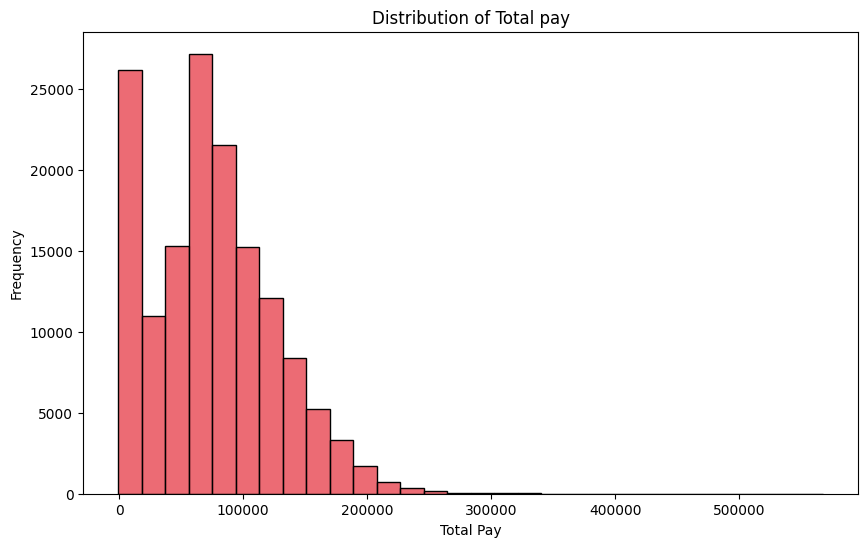

In [30]:

plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, kde=False, color='#e63946')
plt.title('Distribution of Total pay')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()


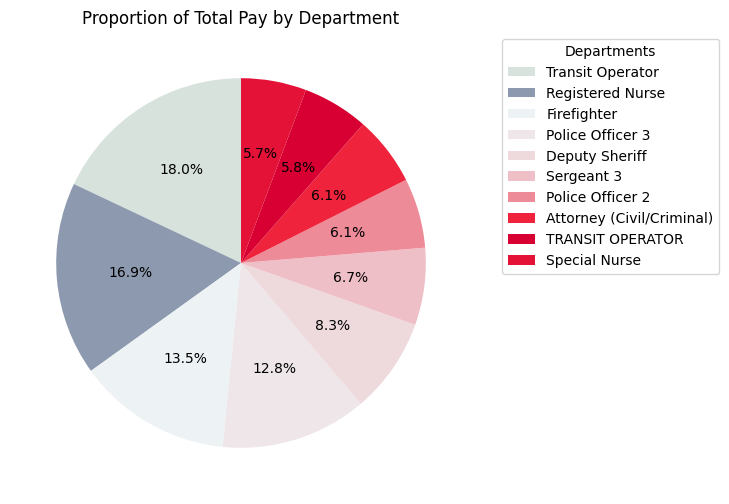

In [36]:
department_pay = df.groupby('JobTitle')['TotalPay'].sum()

# Sort the values to get the top departments in terms of total pay.
top_department_pay = department_pay.sort_values(ascending=False).head(10)

colors = ['#d8e2dc', '#8D99AE', '#EDF2F4', '#EEE6E9', '#EED9DD', '#EEBFC6', '#EE8B98', '#EF233C', '#D80032', '#E41237']

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_department_pay, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a legend
plt.legend(top_department_pay.index, title="Departments", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Proportion of Total Pay by Department')
plt.show()

In [37]:
job_title_group = df.groupby('JobTitle')['TotalPay'].mean()


In [38]:
top_salaries = job_title_group.nlargest(10)
bottom_salaries = job_title_group.nsmallest(10)

print("Top 10 Job Titles with Highest Average Salaries:")
print(top_salaries)


Top 10 Job Titles with Highest Average Salaries:
JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)            302377.730000
Gen Mgr, Public Trnsp Dept                        297769.413333
Asst Chf of Dept (Fire Dept)                      281763.483889
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)      279359.560000
Dep Dir for Investments, Ret                      278592.545000
Name: TotalPay, dtype: float64


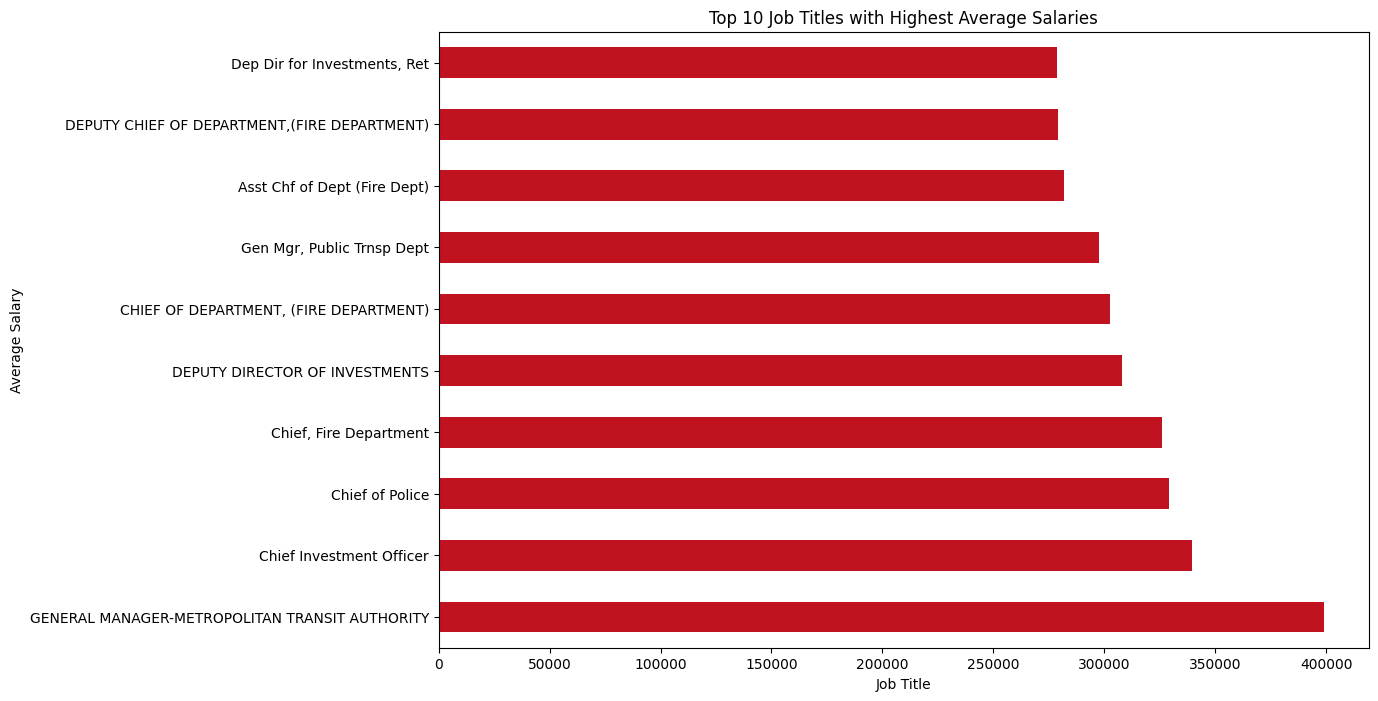

In [39]:
plt.figure(figsize=(12, 8))
job_title_group.nlargest(10).plot(kind='barh', color='#c1121f')
plt.title('Top 10 Job Titles with Highest Average Salaries')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.show()

In [40]:
print("\nBottom 5 Job Titles with Lowest Average Salaries:")
print(bottom_salaries)



Bottom 5 Job Titles with Lowest Average Salaries:
JobTitle
PUBLIC SAFETY COMMUNICATIONS TECHNICIAN     149.510000
BOARD/COMMISSION MEMBER, GROUP II           296.511628
BOARD/COMMISSION MEMBER, GROUP III          638.787879
SPECIAL ASSISTANT XIV                       673.800000
BOARD/COMMISSION MEMBER, GROUP V           1195.904464
SPECIAL EXAMINER                           1201.260000
BdComm Mbr, Grp5,M$100/Mo                  1216.390602
Special Examiner                           1466.713455
BdComm Mbr, Grp3,M=$50/Mtg                 1827.516379
BdComm Mbr, Grp2,M=$25/Mtg                 1836.527016
Name: TotalPay, dtype: float64


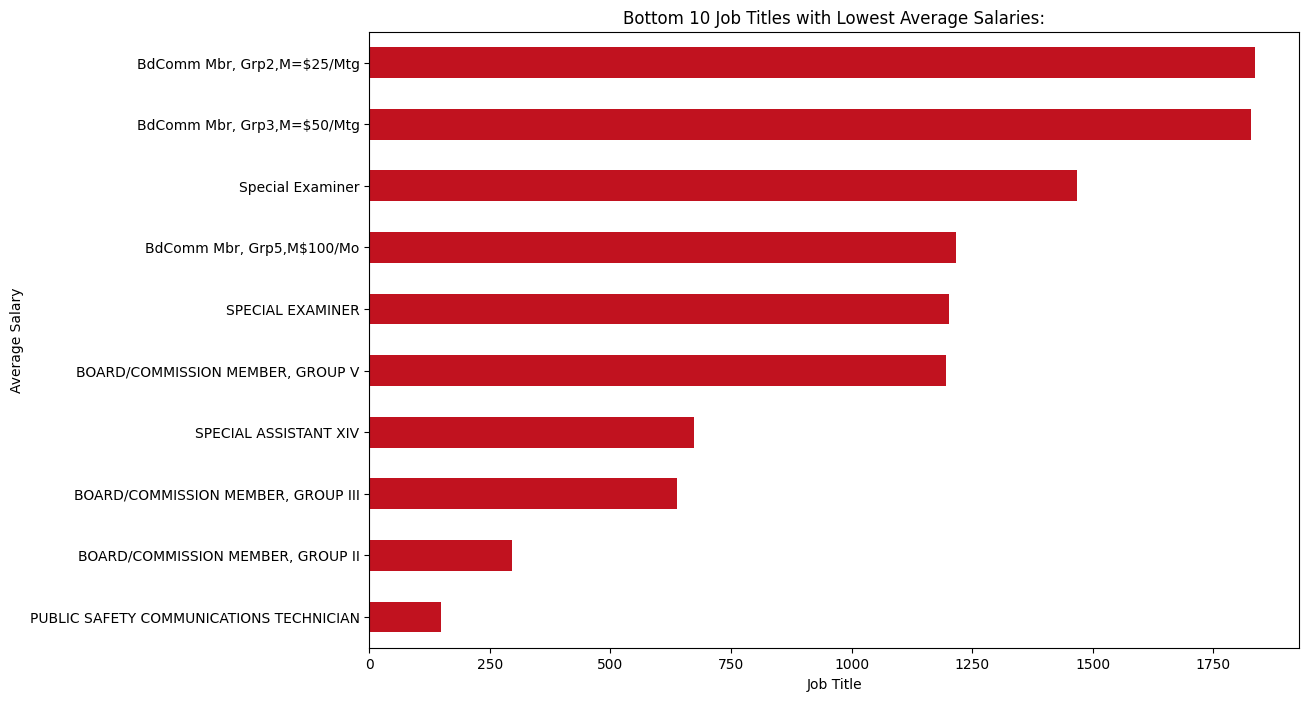

In [41]:
plt.figure(figsize=(12, 8))
job_title_group.nsmallest(10).plot(kind='barh', color='#c1121f')
plt.title('Bottom 10 Job Titles with Lowest Average Salaries:')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.show()

In [42]:
year_group = df.groupby('Year')['TotalPay'].mean()
print(year_group)


Year
2011    71744.103871
2012    74113.262265
2013    78657.273787
2014    75470.824073
Name: TotalPay, dtype: float64


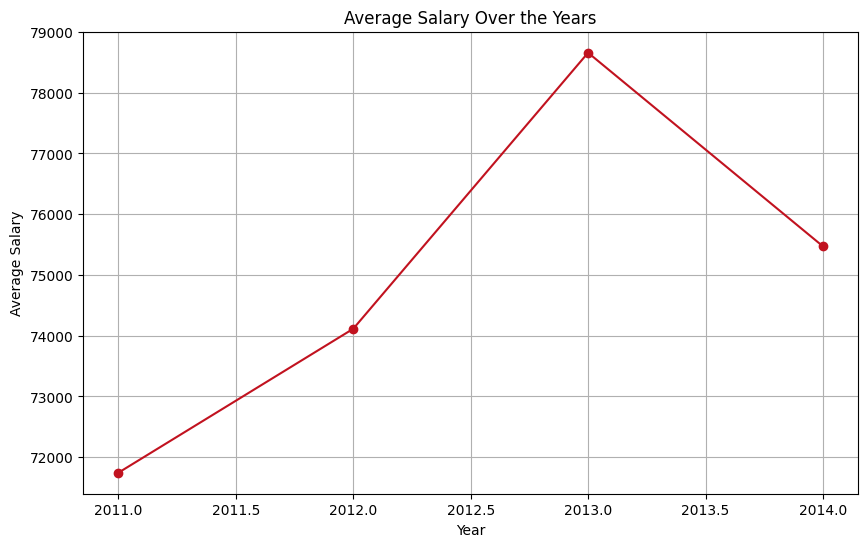

In [43]:
plt.figure(figsize=(10, 6))
year_group.plot(kind='line', marker='o', color='#c1121f')
plt.title('Average Salary Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()


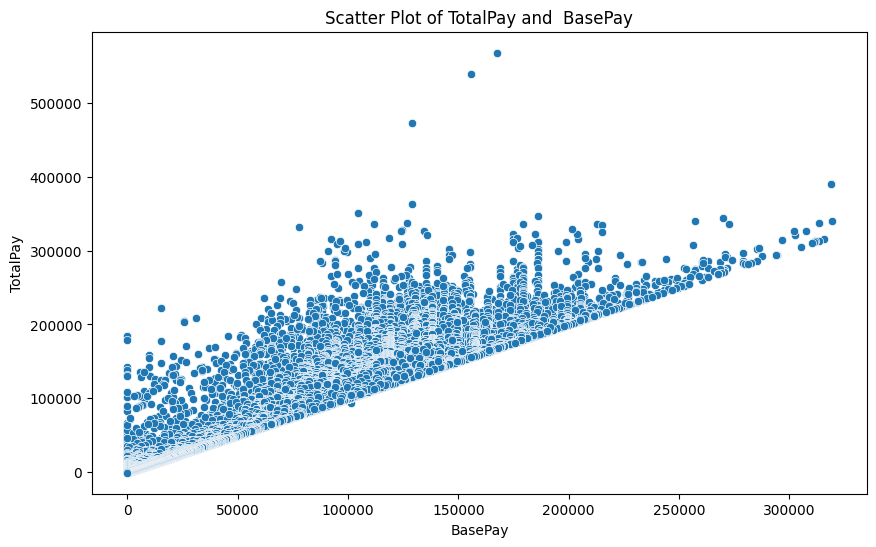

In [44]:
numerical_column = 'BasePay'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[numerical_column], y=df['TotalPay'])
plt.title(f'Scatter Plot of TotalPay and  BasePay')
plt.xlabel(numerical_column)
plt.ylabel('TotalPay')
plt.show()